In [1]:
import pandas as pd
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ODOC/minwon_df.csv', sep=",", dtype=str)

In [2]:
!pip install vaderSentiment

In [3]:
!pip install textblob vaderSentiment seaborn matplotlib

###VADER분석기
 주로 소설 미디어의 텍스트에 대한 감성 분석을 제공하기 위한 패키지다. 뛰어난 감성 분석 결과를 제공하며, 비교적 빠른 수행 시간을 보장해 대용량 텍스트 데이터에 잘 사용된다.

 -> 1차 정제된 데이터이기에, 무의미한 결과 도출

In [18]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# # VADER 분석기 객체 생성
# analyzer = SentimentIntensityAnalyzer()

# # 감성 분석 함수 정의
# def analyze_sentiment_vader(text):
#     sentiment = analyzer.polarity_scores(text)
#     return sentiment['compound']  # -1 (부정) to 1 (긍정)

# # title과 content를 결합하여 감성 분석 수행
# data['combined_text'] = data['title'] + ' ' + data['content']
# data['sentiment'] = data['combined_text'].apply(analyze_sentiment_vader)

# # 결과 출력
# data[['title', 'content', 'sentiment']]


,title,content,sentiment
0,주차장이 너무 어두워요,중구 전동 25-328 번지옆 전동쉼터 옆 공영주차장이 야간에 너무 어두워요\n...,0.0
1,뭐에요? 거잠포선착장 쓰레기 그대로잖아요? 하나도 안 되어있네요?,아니 거기 오는 사람들을 위해서 버스정류장을 만들고 해안 데크길을 설치 했으면 그런...,0.0
2,9100번 광역버스 배차간격 준수 요청 건,집안 사정으로 서구에서 남동구를 들려서 9100번 버스를 통해 인천에서 서울로 출퇴...,0.0
3,46번버스 신흥교통 정상이아닌 버스업체,46번버스 신흥교통 손님에게 막말하고 잘못하고도 사과전혀없고 그냥 배째라는식으로 직...,0.0
4,살려주세요 제발 요즘 가게 망하게 만드는 일들만 일어나네요..제발요(영종도 호텔),요즘 전부 어렵죠?\n영종도는 공항 상대로 영업을 하는 가게들이 많아서 특히나 더 ...,0.0
...,...,...,...
1222,교통지원과 담당자 지금 모하자는거에요??,중구청서 위탁한 사설 업체 수준이 바닥이니 이런 문제가 생기는거 아닙니까?\n\n당...,0.0
1223,보안등 설치 건의건,전동소방서에서 자유공원 광장 올라가는 길목에 선왕사라는 절이 있는데 그 건물 위 ...,0.0
1224,대형화물차 주차하는자리에 자가용을 세웠는데요,제 신랑한테 방금 전화가 왔네요 중구에 화물받치는 자리에 세워놓은 자가용 견인해갓...,0.0
1225,79번 버스운전사를 고발합니다.,안녕하세요? 저는 79번버스를 퇴근하는 승객입니다.\n\n항상 탈때마다 느끼는건데....,0.0


In [17]:
data.sentiment.unique()

array([0.    , 0.5093])

### TextBlob분석기
간단한 텍스트 처리와 자연어 처리 작업을 신속하게 수행할 수 있는 유용한 도구이다. 프로토타입을 개발하거나 기본적인 감성 분석, 번역, 명사 추출 등의 작업에 적합합니다.

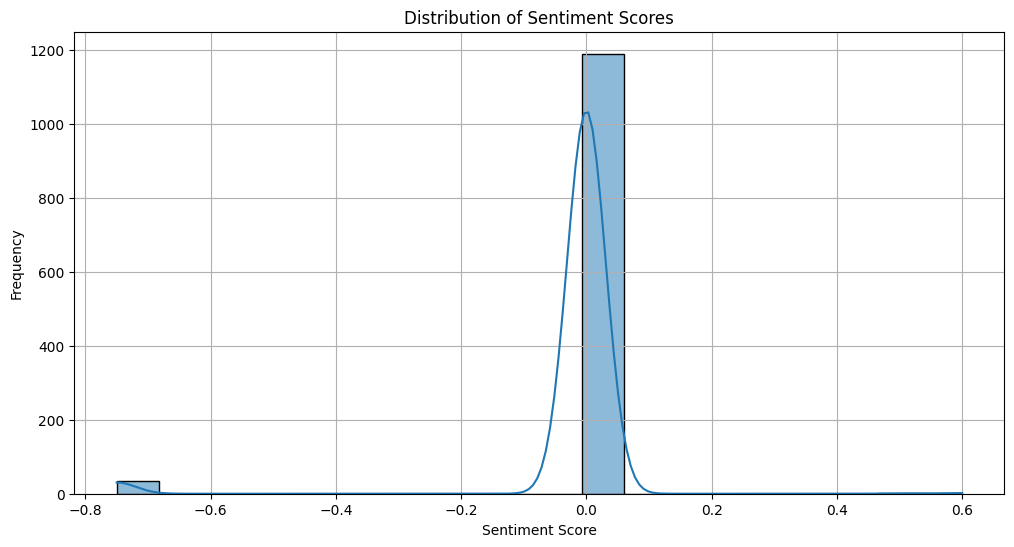

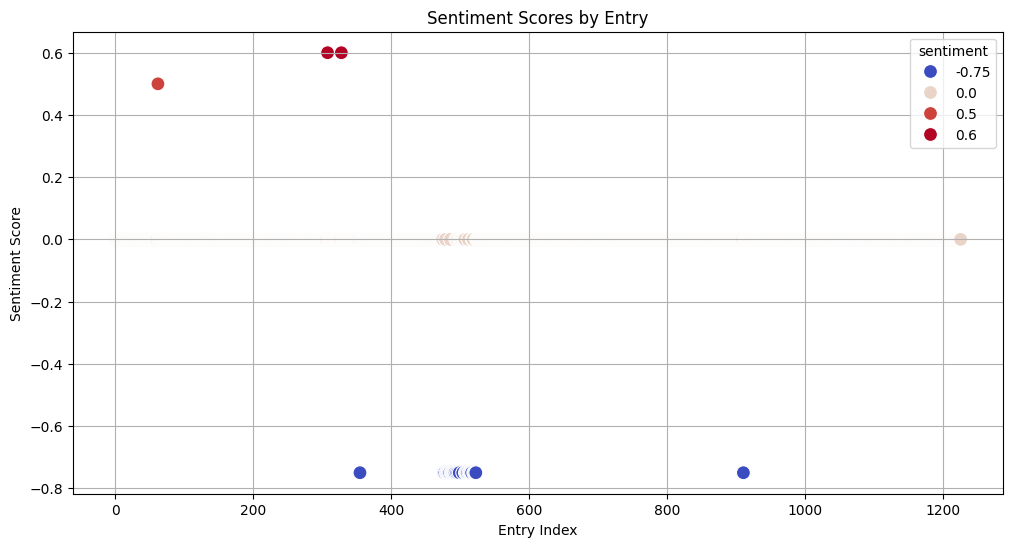

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# TextBlob 감성 분석 함수 정의
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # -1 (부정) to 1 (긍정)

# title과 content를 결합하여 감성 분석 수행
data['combined_text'] = data['title'] + ' ' + data['content']
data['sentiment'] = data['combined_text'].apply(analyze_sentiment)


## 결과 시각화

# 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(data['sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 산점도
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data.index, y=data['sentiment'], hue=data['sentiment'], palette='coolwarm', s=100)
plt.title('Sentiment Scores by Entry')
plt.xlabel('Entry Index')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()


대체적으로 0~0.1정도로 natural한 수준으로 평가되곤한다.
다만, 긍정과 부정으로만 비교했을 때 -0.75(부정)의 민원이 비교적 많다.

In [6]:
# 감성 점수에 따라 긍정적, 부정적, 중립적 텍스트로 분류
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_label'] = data['sentiment'].apply(classify_sentiment)

# 긍정적, 부정적, 중립적 텍스트 확인
positive_texts = data[data['sentiment_label'] == 'Positive']
negative_texts = data[data['sentiment_label'] == 'Negative']
neutral_texts = data[data['sentiment_label'] == 'Neutral']


In [19]:
print("Positive Texts:")
positive_texts[['title', 'content']]


Positive Texts:


,title,content
62,가로수 정비 요청합니다!,나무가 도로위로 쓰러져있어 통행이 불편하네요ㅠㅠ\n빠른 정비 부탁드립니다 :)\n※...
308,중구 은하수로 412 푸르지오 옆 초등학교 및 KXX Apt 주말 공사 소음 공해,"푸르지오 104동, 105동 옆 초등학교 부지 및 105동 뒤 KXX 아파트 주말 ..."
328,영종국제도시 지역 생수 지원계획 관련 문의,안녕하세요.\n생수를 지원한다는 공문을 봤습니다.\n그런데 배부장소가 APT 관리사...


In [20]:
print("\nNegative Texts:")
negative_texts[['title', 'content']]


Negative Texts:


,title,content
355,을왕리 선녀바위 불법 움박설치 및 환경오염신고,사진에서 보시는 바와 같이 얼마전부터 해변에 움막을 치고 주거를 하고 있습니다. 또...
476,"집합건축물법 무시,편파적인 영업허가,협의 후 허가 약속 어기는 공무원 사퇴하세요!","인천 중구청 용유지원단의 김종하 과장, 김수하 주무관 등 관련 공무원은 불공정하고 ..."
477,절차무시. 집건법 위반. 중구청영종용유지원단 고발합니다.,호텔 사기분양 수분양자 피눈물..저희가족 좀 살려주세요.. \n\n지금 약 300명...
478,공무원은 불공정하고 불법적인 행정처리를 당장 시정하라!,"인천 중구청 용유지원단의 김종하 과장, 김수하 주무관 등 관련 공무원은 불공정하고 ..."
480,인천 중구청 영종용유지원단 공무원은 편파적이고 불공정하며 불법적으로 행정처리합니다,"인천 중구청 용유지원단의 김종하 과장, 김수하 주무관 등 관련 공무원은 불공정하고 ..."
481,용유지원단이 요구한 공용부분의 위생과 안전을 담보하는 서류! 당장 감사받으십시오!,"인천 중구청 용유지원단의 김종하 과장, 김수하 주무관 등 관련 공무원은 불공정하고 ..."
482,인천 중구청 용유지원단의 관련 공무원 당장시정하라! 수백명의 목숨이 달렸다!,"인천 중구청 용유지원단의 김종하 과장, 김수하 주무관 등 관련 공무원은 불공정하고 ..."
483,인천 영종골든튤립호텔에 대한 부당 영업허가 즉각 취하해주세요,"인천 중구청 용유지원단의 김종하 과장, 김수하 주무관 등 관련 공무원은 불공정하고 ..."
484,중구청 용유지원단은 영종골든튤립에 불공정한 복수영업허가 철회하라,"인천 중구청 용유지원단의 김종하 과장,방유순 팀장 김수하 주무관 등 관련 공무원은 ..."
485,영종용유지원단의 무책임한 행정으로 발생한 골든튜립호텔분쟁 해결 호소합니다,"인천 중구청 용유지원단의 김종하 과장,방유순 팀장 김수하 주무관 등 관련 공무원은 ..."


In [21]:
print("\nNeutral Texts:")
neutral_texts[['title', 'content']]


Neutral Texts:


,title,content
0,주차장이 너무 어두워요,중구 전동 25-328 번지옆 전동쉼터 옆 공영주차장이 야간에 너무 어두워요\n...
1,뭐에요? 거잠포선착장 쓰레기 그대로잖아요? 하나도 안 되어있네요?,아니 거기 오는 사람들을 위해서 버스정류장을 만들고 해안 데크길을 설치 했으면 그런...
2,9100번 광역버스 배차간격 준수 요청 건,집안 사정으로 서구에서 남동구를 들려서 9100번 버스를 통해 인천에서 서울로 출퇴...
3,46번버스 신흥교통 정상이아닌 버스업체,46번버스 신흥교통 손님에게 막말하고 잘못하고도 사과전혀없고 그냥 배째라는식으로 직...
4,살려주세요 제발 요즘 가게 망하게 만드는 일들만 일어나네요..제발요(영종도 호텔),요즘 전부 어렵죠?\n영종도는 공항 상대로 영업을 하는 가게들이 많아서 특히나 더 ...
...,...,...
1222,교통지원과 담당자 지금 모하자는거에요??,중구청서 위탁한 사설 업체 수준이 바닥이니 이런 문제가 생기는거 아닙니까?\n\n당...
1223,보안등 설치 건의건,전동소방서에서 자유공원 광장 올라가는 길목에 선왕사라는 절이 있는데 그 건물 위 ...
1224,대형화물차 주차하는자리에 자가용을 세웠는데요,제 신랑한테 방금 전화가 왔네요 중구에 화물받치는 자리에 세워놓은 자가용 견인해갓...
1225,79번 버스운전사를 고발합니다.,안녕하세요? 저는 79번버스를 퇴근하는 승객입니다.\n\n항상 탈때마다 느끼는건데....


Natural과 긍정 부정을 나누는 기준이 명확한지 모르겠다.
- 민원이라는 도메인 특성때문에 전체적으로 부정적인 느낌이 있다.